<a href="https://colab.research.google.com/github/Gobi17/Social-Media-Analysis/blob/main/Social_Media_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file1 = 'Content.csv'
file2 = 'ReactionTypes.csv'
file3 = 'Reactions.csv'
output_file = 'merged_data.csv'

def merge_csv_files(file1, file2, file3, output_file):
  """
  Merges three CSV files into a single output file.

  Args:
    file1: Path to the first CSV file.
    file2: Path to the second CSV file.
    file3: Path to the third CSV file.
    output_file: Path to the output CSV file.
  """


    # Read the CSV files into DataFrames
  df1 = pd.read_csv(file1)
  df2 = pd.read_csv(file2)
  df3 = pd.read_csv(file3)

  df1=df1.drop('Type', axis=1)

    # Merge the DataFrames (adjust the merge logic based on your specific needs)
  merged_df = pd.merge(df1, df3, on='Content ID', how='inner')  # Example: Inner join on 'common_column_name'
  merged_df = pd.merge(merged_df, df2, on='Type', how='left')  # Example: Left join on 'another_common_column_name'

  print(merged_df)

  merged_df=merged_df.drop(merged_df.columns[[0,3,6]], axis=1)

  print(merged_df)
    # Save the merged DataFrame to a new CSV file
  merged_df.to_csv(output_file, index=False)

  print(f"Successfully merged files into {output_file}")


# Example Usage:
file1 = 'Content.csv'
file2 = 'ReactionTypes.csv'
file3 = 'Reactions.csv'
output_file = 'merged_file.csv'

merge_csv_files(file1, file2, file3, output_file)


       Unnamed: 0_x                            Content ID    Category  \
0                 0  97522e57-d9ab-4bd6-97bf-c24d952602d2    Studying   
1                 0  97522e57-d9ab-4bd6-97bf-c24d952602d2    Studying   
2                 0  97522e57-d9ab-4bd6-97bf-c24d952602d2    Studying   
3                 0  97522e57-d9ab-4bd6-97bf-c24d952602d2    Studying   
4                 0  97522e57-d9ab-4bd6-97bf-c24d952602d2    Studying   
...             ...                                   ...         ...   
24568           999  75d6b589-7fae-4a6d-b0d0-752845150e56  technology   
24569           999  75d6b589-7fae-4a6d-b0d0-752845150e56  technology   
24570           999  75d6b589-7fae-4a6d-b0d0-752845150e56  technology   
24571           999  75d6b589-7fae-4a6d-b0d0-752845150e56  technology   
24572           999  75d6b589-7fae-4a6d-b0d0-752845150e56  technology   

       Unnamed: 0_y        Type          Datetime  Unnamed: 0 Sentiment  Score  
0                 1     disgust   07-11-20

In [ ]:
import pandas as pd

df=pd.read_csv('merged_file.csv')


def category_total(df, category, score_col,n=5):

  category_total = df.groupby(category)[score_col].sum()
  top_n = category_total.nlargest(n)
  return top_n


# Calculate total scores for each category
category_total = category_total(df, 'Category', 'Score')

print(category_total)

Category
animals           71242
healthy eating    69067
technology        68521
science           66549
culture           64952
Name: Score, dtype: int64


<ipython-input-13-ce43303e873a>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Datetime'] = pd.to_datetime(data['Datetime'], errors='coerce')  # Convert to datetime


16 Unique Categories
Total reactions for the most popular category is 1897
2021-01 is the month with most posts


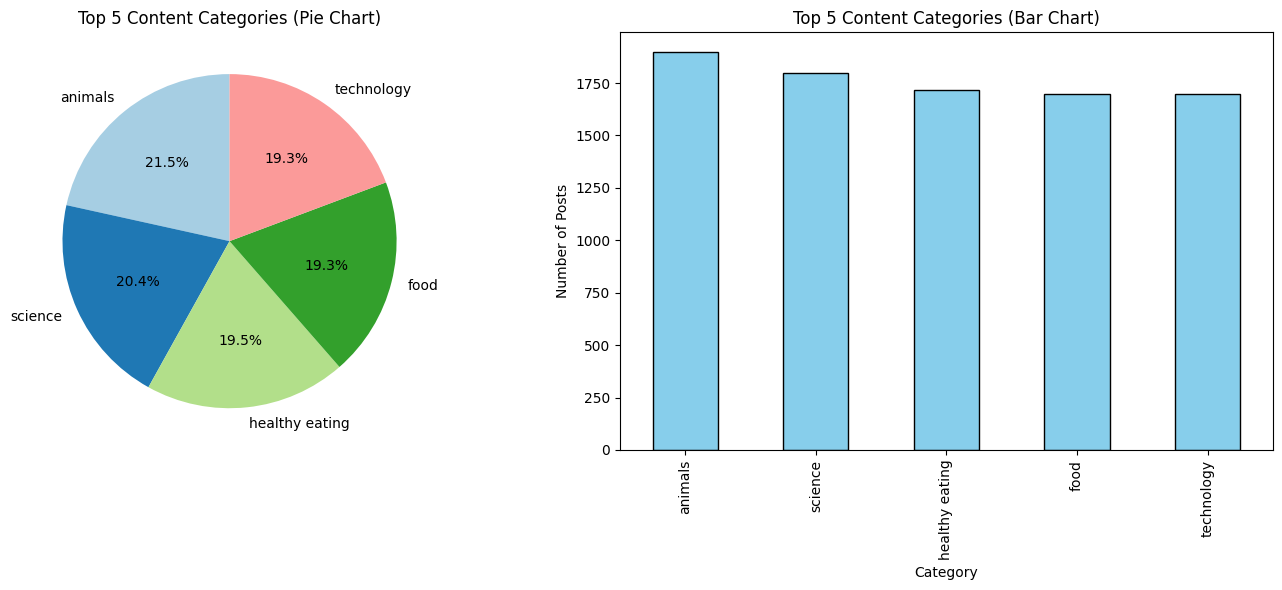

(16, 1897, '2021-01')

In [ ]:
import matplotlib.pyplot as plt
data=pd.read_csv('Content Data set.csv')
# Clean and preprocess the dataset
data['Datetime'] = pd.to_datetime(data['Datetime'], errors='coerce')  # Convert to datetime
data['Month'] = data['Datetime'].dt.to_period('M')  # Extract month-year for grouping

# Insights and visualizations

# 1. Top 5 content categories
top_categories = data['Category'].value_counts().head(5)

# 2. Number of unique categories
unique_categories_count = data['Category'].nunique()
print(str(unique_categories_count) +" Unique Categories")

# 3. Total reactions for the most popular category
most_popular_category = top_categories.idxmax()
reactions_most_popular_category = data[data['Category'] == most_popular_category].shape[0]
print("Total reactions for the most popular category is " + str(reactions_most_popular_category) )

# 4. Month with the most posts
month_with_most_posts = data['Month'].value_counts().idxmax()
print(str(month_with_most_posts) + " is the month with most posts")

# Visualization: Top 5 content categories
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Pie chart
top_categories.plot.pie(autopct='%1.1f%%', ax=axes[0], startangle=90, colors=plt.cm.Paired.colors)
axes[0].set_title('Top 5 Content Categories (Pie Chart)')
axes[0].set_ylabel('')  # Remove y-label for better visualization

# Bar chart
top_categories.plot.bar(ax=axes[1], color='skyblue', edgecolor='black')
axes[1].set_title('Top 5 Content Categories (Bar Chart)')
axes[1].set_ylabel('Number of Posts')
axes[1].set_xlabel('Category')

plt.tight_layout()
plt.show()

unique_categories_count, reactions_most_popular_category, str(month_with_most_posts)
